In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

In [4]:
# Function for setting style and size of plot
def set_size_style(width, height, style=None):
    plt.figure(figsize=(width, height))
    if style != None:
        sns.set_style(style)

# Function for customizating the plot
def customize_plot(plot, title:str, xlabel:str,  ylabel:str, title_font:int, label_font:int):
    plot.set_title(title, fontsize = title_font, weight='bold')
    plot.set_xlabel(xlabel, fontsize = label_font, weight='bold')
    plot.set_ylabel(ylabel, fontsize = label_font, weight='bold')

In [4]:
df= pd.read_csv(r'C:/Users/amban/ANA500/heart_2022_with_nans.csv', header = 0)
# Display the first few rows
print(df.head())

     State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 0.0               0.0   
1  Alabama  Female     Excellent                 0.0               0.0   
2  Alabama  Female     Very good                 2.0               3.0   
3  Alabama  Female     Excellent                 0.0               0.0   
4  Alabama  Female          Fair                 2.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                 No   
1                                                NaN                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         8.0          NaN             

In [12]:
df.shape

(445132, 40)

In [13]:
df.tail()


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,...,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
445131,Virgin Islands,Male,Very good,0.0,1.0,NaN,Yes,5.0,None of them,No,...,1.68,63.50,22.60,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [15]:
#Printing column with missing values
missing_columns = df.columns[df.isnull().any()]
print("Columns with missing values:")
print(missing_columns)


Columns with missing values:
Index(['GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth',
       'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')


In [16]:
#Prints rows with missing values
rows_with_missing = df[df.isnull().any(axis=1)]
print("Rows with missing values:")
print(rows_with_missing)


Rows with missing values:
                 State     Sex GeneralHealth  PhysicalHealthDays  \
0              Alabama  Female     Very good                 0.0   
1              Alabama  Female     Excellent                 0.0   
2              Alabama  Female     Very good                 2.0   
3              Alabama  Female     Excellent                 0.0   
4              Alabama  Female          Fair                 2.0   
...                ...     ...           ...                 ...   
445125  Virgin Islands    Male          Good                 0.0   
445126  Virgin Islands    Male          Good                 0.0   
445127  Virgin Islands  Female          Good                 0.0   
445129  Virgin Islands  Female          Poor                30.0   
445131  Virgin Islands    Male     Very good                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
0                    0.0  Within past year (anytime less than 12 months ...   

In [17]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:")
print(numerical_columns)


Numerical columns:
Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI'],
      dtype='object')


In [18]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:")
print(categorical_columns)


Categorical columns:
Index(['State', 'Sex', 'GeneralHealth', 'LastCheckupTime',
       'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')


In [20]:
# Find categorical columns that have missing values
categorical_with_missing = list(set(categorical_columns) & set(missing_columns))

print(f"Number of categorical columns with missing values: {len(categorical_with_missing)}")

Number of categorical columns with missing values: 32


In [21]:
df.isna().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

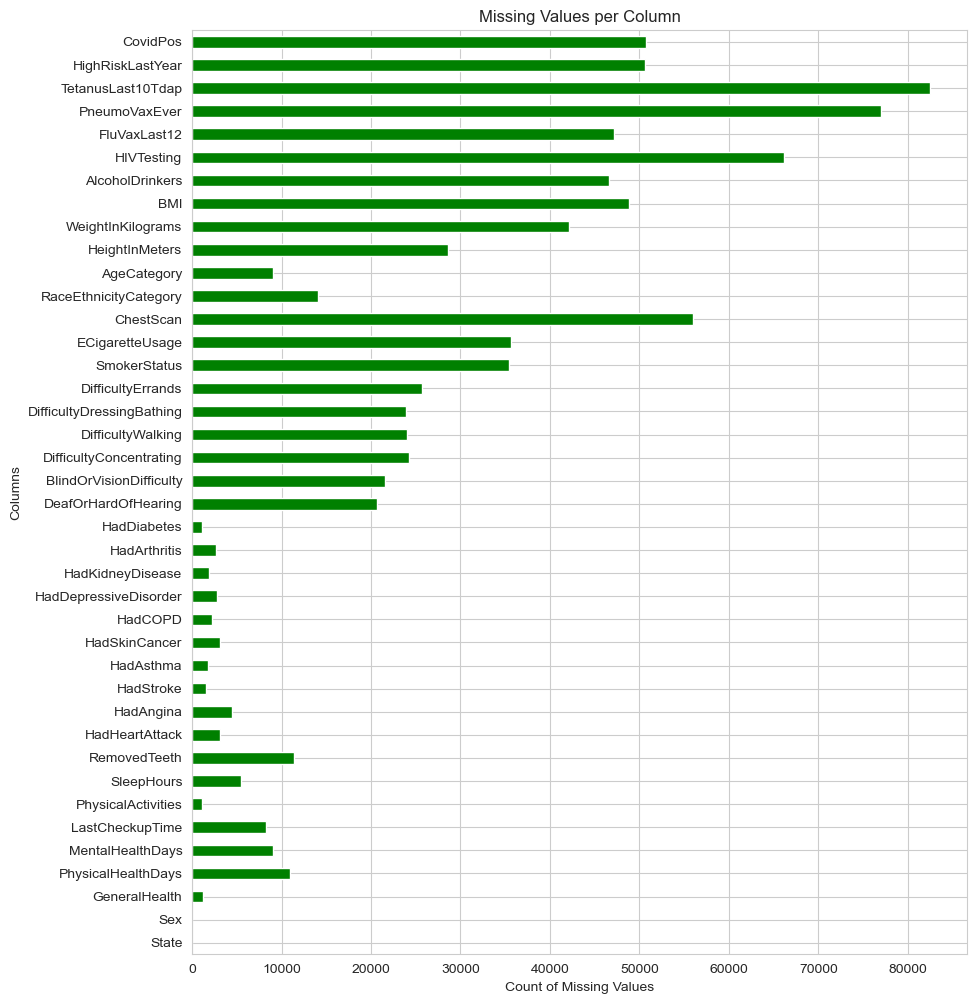

In [22]:
# Setting figure size and style
sns.set_style("whitegrid")
plt.figure(figsize=(10,12))

# Plot missing values as a horizontal bar chart
df.isna().sum().plot(kind='barh', color='green')

# Add title and labels
plt.title("Missing Values per Column")
plt.xlabel("Count of Missing Values")
plt.ylabel("Columns")
plt.show()

In [23]:
# Here, we would be calculating the percentage of null values in each column
null_values = round(df.isna().sum()/df.shape[0] * 100,2)
null_values

State                         0.00
Sex                           0.00
GeneralHealth                 0.27
PhysicalHealthDays            2.45
MentalHealthDays              2.04
LastCheckupTime               1.87
PhysicalActivities            0.25
SleepHours                    1.23
RemovedTeeth                  2.55
HadHeartAttack                0.69
HadAngina                     0.99
HadStroke                     0.35
HadAsthma                     0.40
HadSkinCancer                 0.71
HadCOPD                       0.50
HadDepressiveDisorder         0.63
HadKidneyDisease              0.43
HadArthritis                  0.59
HadDiabetes                   0.24
DeafOrHardOfHearing           4.64
BlindOrVisionDifficulty       4.84
DifficultyConcentrating       5.45
DifficultyWalking             5.39
DifficultyDressingBathing     5.37
DifficultyErrands             5.76
SmokerStatus                  7.97
ECigaretteUsage               8.01
ChestScan                    12.59
RaceEthnicityCategor

In [24]:
# We want to Check any duplicate rows
duplicate_rows = df[df.duplicated()]

# Count the number of duplicate rows if any
num_duplicates = duplicate_rows.shape[0]

print(f"Number of duplicate rows: {num_duplicates}")

# If duplicates exist, we display the first few duplicate rows
if num_duplicates > 0:
    print("Sample duplicate rows:")
    print(duplicate_rows.head())


Number of duplicate rows: 157
Sample duplicate rows:
            State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
7310       Alaska    Male     Very good                 0.0               0.0   
11503     Arizona  Female     Excellent                 0.0               0.0   
28206  California    Male     Excellent                 0.0               0.0   
29339  California    Male     Excellent                 0.0               0.0   
32711  California  Female           NaN                 NaN               NaN   

                                         LastCheckupTime PhysicalActivities  \
7310   Within past year (anytime less than 12 months ...                Yes   
11503  Within past year (anytime less than 12 months ...                Yes   
28206  Within past year (anytime less than 12 months ...                Yes   
29339  Within past year (anytime less than 12 months ...                Yes   
32711                                                NaN         

In [25]:
def find_duplicate_columns(df):
    duplicate_columns = []
    column_names = df.columns
    
    for i in range(len(column_names)):
        for j in range(i + 1, len(column_names)):  # Compare each column with others
            if df[column_names[i]].equals(df[column_names[j]]):
                duplicate_columns.append(column_names[j])  # Store the duplicate column name

    return duplicate_columns

# Finding duplicate columns in the dataset
duplicate_cols = find_duplicate_columns(df)

# Print results
if duplicate_cols:
    print(f"Duplicate columns found: {duplicate_cols}")
else:
    print("No duplicate columns found.")


No duplicate columns found.


In [26]:
# Removing duplicate rows
df.drop_duplicates()


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,...,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [27]:
df = df.drop_duplicates().reset_index(drop=True)
print(f"Rows after dropping duplicates: {df.shape[0]}")


Rows after dropping duplicates: 444975


In [28]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434053.000000,435913.000000,439527.000000,416470.000000,403044.000000,396316.000000
mean,4.349372,4.384164,7.022909,1.702690,83.074632,28.529907
std,8.689968,8.388541,1.502618,0.107178,21.448241,6.554917
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [29]:
# List of all column names
column_names = df.columns
print("Columns in the dataset:")
print(column_names)


Columns in the dataset:
Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')


In [30]:
# Here's the list of columns that would be kept based on the project requirements
columns_to_keep = [
    'BMI', 'HadDiabetes', 'SmokerStatus', 'PhysicalActivities', 'AlcoholDrinkers',
    'AgeCategory', 'Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
    'SleepHours', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadCOPD',
    'HadDepressiveDisorder', 'HadArthritis', 'RaceEthnicityCategory'
]

# Drop all other columns (i.e., columns not in the selected list)
df_cleaned = df[columns_to_keep]

# Display the updated DataFrame shape
print(f"New dataset shape after dropping unnecessary columns: {df_cleaned.shape}")

# Display the first few rows of the cleaned dataset
df_cleaned.head()


New dataset shape after dropping unnecessary columns: (444975, 18)


,BMI,HadDiabetes,SmokerStatus,PhysicalActivities,AlcoholDrinkers,AgeCategory,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadCOPD,HadDepressiveDisorder,HadArthritis,RaceEthnicityCategory
0,NaN,Yes,Never smoked,No,No,Age 80 or older,Female,Very good,0.0,0.0,8.0,No,No,No,No,No,No,"White only, Non-Hispanic"
1,26.57,No,Never smoked,No,No,Age 80 or older,Female,Excellent,0.0,0.0,6.0,No,No,No,No,No,No,"White only, Non-Hispanic"
2,25.61,No,Never smoked,Yes,No,Age 55 to 59,Female,Very good,2.0,3.0,5.0,No,No,No,No,No,No,"White only, Non-Hispanic"
3,23.30,No,Current smoker - now smokes some days,Yes,No,NaN,Female,Excellent,0.0,0.0,7.0,No,No,No,No,No,Yes,"White only, Non-Hispanic"
4,21.77,No,Never smoked,Yes,Yes,Age 40 to 44,Female,Fair,2.0,0.0,9.0,No,No,No,No,No,No,"White only, Non-Hispanic"


In [31]:
# Checking for missing values in selected columns
missing_values = df_cleaned.isna().sum()
missing_percentage = (missing_values / len(df_cleaned)) * 100

# Creating a DataFrame for better visualization
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})

# Display the missing values table
print(missing_df)


                       Missing Values  Percentage (%)
BMI                             48659       10.935221
HadDiabetes                      1082        0.243160
SmokerStatus                    35316        7.936626
PhysicalActivities               1088        0.244508
AlcoholDrinkers                 46428       10.433845
AgeCategory                      9069        2.038092
Sex                                 0        0.000000
GeneralHealth                    1193        0.268105
PhysicalHealthDays              10922        2.454520
MentalHealthDays                 9062        2.036519
SleepHours                       5448        1.224338
HadHeartAttack                   3060        0.687679
HadAngina                        4400        0.988820
HadStroke                        1552        0.348784
HadCOPD                          2214        0.497556
HadDepressiveDisorder            2807        0.630822
HadArthritis                     2628        0.590595
RaceEthnicityCategory       

In [36]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer

# Handling Numerical Features (Impute with Median)
numerical_features = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']

# Initialize the imputer with median strategy
num_imputer = SimpleImputer(strategy='median')

# Apply median imputation
df[numerical_features] = num_imputer.fit_transform(df[numerical_features])

# Print confirmation
print("Numerical feature imputation completed successfully.")
# Print the first few rows to verify
print(df[numerical_features].head())


Numerical feature imputation completed successfully.
     BMI  PhysicalHealthDays  MentalHealthDays  SleepHours
0  27.44                 0.0               0.0         8.0
1  26.57                 0.0               0.0         6.0
2  25.61                 2.0               3.0         5.0
3  23.30                 0.0               0.0         7.0
4  21.77                 2.0               0.0         9.0


In [38]:
# Import necessary libraries for imputation
from sklearn.impute import SimpleImputer
import numpy as np

# Creating copies of the dataset to avoid modifying the original
df_imputed = df_cleaned.copy()

# Handling Numerical Features (Impute with Median)
numerical_features = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']
num_imputer = SimpleImputer(strategy='median')

# Applying median imputation
df_imputed[numerical_features] = num_imputer.fit_transform(df_imputed[numerical_features])

# Handling Categorical Features (Impute with Mode)
categorical_features = ['HadDiabetes', 'SmokerStatus', 'PhysicalActivities', 'AlcoholDrinkers', 
                        'AgeCategory', 'GeneralHealth', 'RaceEthnicityCategory']

cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply mode imputation
df_imputed[categorical_features] = cat_imputer.fit_transform(df_imputed[categorical_features])

# Display the updated missing values count
missing_after_imputation = df_imputed.isna().sum()

# Print missing values summary
print("Missing Values After Imputation:\n")
print(missing_after_imputation.to_string())


Missing Values After Imputation:

BMI                         0
HadDiabetes                 0
SmokerStatus                0
PhysicalActivities          0
AlcoholDrinkers             0
AgeCategory                 0
Sex                         0
GeneralHealth               0
PhysicalHealthDays          0
MentalHealthDays            0
SleepHours                  0
HadHeartAttack           3060
HadAngina                4400
HadStroke                1552
HadCOPD                  2214
HadDepressiveDisorder    2807
HadArthritis             2628
RaceEthnicityCategory       0


In [39]:
# Printing missing values for numerical columns
print("Missing Values After Imputation (Numerical Features):\n")
print(df_imputed[numerical_features].isna().sum())

# Printing missing values categorical columns
print("\nMissing Values After Imputation (Categorical Features):\n")
print(df_imputed[categorical_features].isna().sum())


Missing Values After Imputation (Numerical Features):

BMI                   0
PhysicalHealthDays    0
MentalHealthDays      0
SleepHours            0
dtype: int64

Missing Values After Imputation (Categorical Features):

HadDiabetes              0
SmokerStatus             0
PhysicalActivities       0
AlcoholDrinkers          0
AgeCategory              0
GeneralHealth            0
RaceEthnicityCategory    0
dtype: int64


Our next step is to impute the remaining missing binary categorical variables with mode

In [40]:
# Handling remaining missing binary categorical variables with mode
binary_categorical_features = ['HadHeartAttack', 'HadAngina', 'HadStroke', 'HadCOPD',
                               'HadDepressiveDisorder', 'HadArthritis']

# Impute missing values with mode
binary_imputer = SimpleImputer(strategy='most_frequent')
df_imputed[binary_categorical_features] = binary_imputer.fit_transform(df_imputed[binary_categorical_features])

# Verifying missing values after imputation
missing_after_final_imputation = df_imputed.isna().sum()

# Converting missing values summary into a DataFrame for visualization
missing_final_df = missing_after_final_imputation.to_frame(name="Final Missing Values")

# Printing missing values summary after final imputation
print("Final Missing Values After Imputation:\n")
print(missing_final_df.to_string())



Final Missing Values After Imputation:

                       Final Missing Values
BMI                                       0
HadDiabetes                               0
SmokerStatus                              0
PhysicalActivities                        0
AlcoholDrinkers                           0
AgeCategory                               0
Sex                                       0
GeneralHealth                             0
PhysicalHealthDays                        0
MentalHealthDays                          0
SleepHours                                0
HadHeartAttack                            0
HadAngina                                 0
HadStroke                                 0
HadCOPD                                   0
HadDepressiveDisorder                     0
HadArthritis                              0
RaceEthnicityCategory                     0


In [41]:
# Checking if 'HeightInMeters' and 'WeightInKilograms' exist in the original dataset before preprocessing. This is to confirm why we don't need them.

original_columns = pd.read_csv(r'C:/Users/amban/ANA500/heart_2022_with_nans.csv', header = 0).columns

# Check if the columns were originally present
height_weight_exist = {'HeightInMeters': 'HeightInMeters' in original_columns, 
                       'WeightInKilograms': 'WeightInKilograms' in original_columns}

# Check if these columns exist in the cleaned dataset
height_weight_in_cleaned = {'HeightInMeters': 'HeightInMeters' in df_cleaned.columns, 
                            'WeightInKilograms': 'WeightInKilograms' in df_cleaned.columns}

# Display results
height_weight_exist, height_weight_in_cleaned


({'HeightInMeters': True, 'WeightInKilograms': True},
 {'HeightInMeters': False, 'WeightInKilograms': False})

In [42]:

# List of relevant columns for the analysis
columns_to_keep = [
    'BMI', 'HadDiabetes', 'SmokerStatus', 'PhysicalActivities', 'AlcoholDrinkers',
    'AgeCategory', 'Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
    'SleepHours', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadCOPD',
    'HadDepressiveDisorder', 'HadArthritis', 'RaceEthnicityCategory'
]

# Keep only the selected columns
df_cleaned = df[columns_to_keep]

# Display summary statistics of numerical features
numerical_summary = df_cleaned.describe()

# Print the numerical summary statistics
print("Numerical Summary Statistics:\n")
print(numerical_summary.to_string())



Numerical Summary Statistics:

                 BMI  PhysicalHealthDays  MentalHealthDays     SleepHours
count  444975.000000       444975.000000     444975.000000  444975.000000
mean       28.410723            4.242616          4.294879       7.022628
std         6.195490            8.609002          8.325745       1.493393
min        12.020000            0.000000          0.000000       1.000000
25%        24.410000            0.000000          0.000000       6.000000
50%        27.440000            0.000000          0.000000       7.000000
75%        31.010000            3.000000          4.000000       8.000000
max        99.640000           30.000000         30.000000      24.000000


Mode imputation and updating our dataset 

In [43]:

# List of binary categorical variables with missing values
binary_categorical_vars = ["HadHeartAttack", "HadAngina", "HadStroke", "HadCOPD", 
                           "HadDepressiveDisorder", "HadArthritis"]

# Apply mode imputation (fill missing values with the most frequent value)
for col in binary_categorical_vars:
    mode_value = df[col].mode()[0]  # Get the most frequent value (mode)
    df[col].fillna(mode_value, inplace=True)  # Fill missing values

# Verify if missing values are fixed
missing_values_after_imputation = df[binary_categorical_vars].isnull().sum()

# Print the missing values after imputation to confirm changes
print("Missing Values After Mode Imputation:")
print(missing_values_after_imputation)


Missing Values After Mode Imputation:
HadHeartAttack           0
HadAngina                0
HadStroke                0
HadCOPD                  0
HadDepressiveDisorder    0
HadArthritis             0
dtype: int64


<Figure size 1200x800 with 0 Axes>

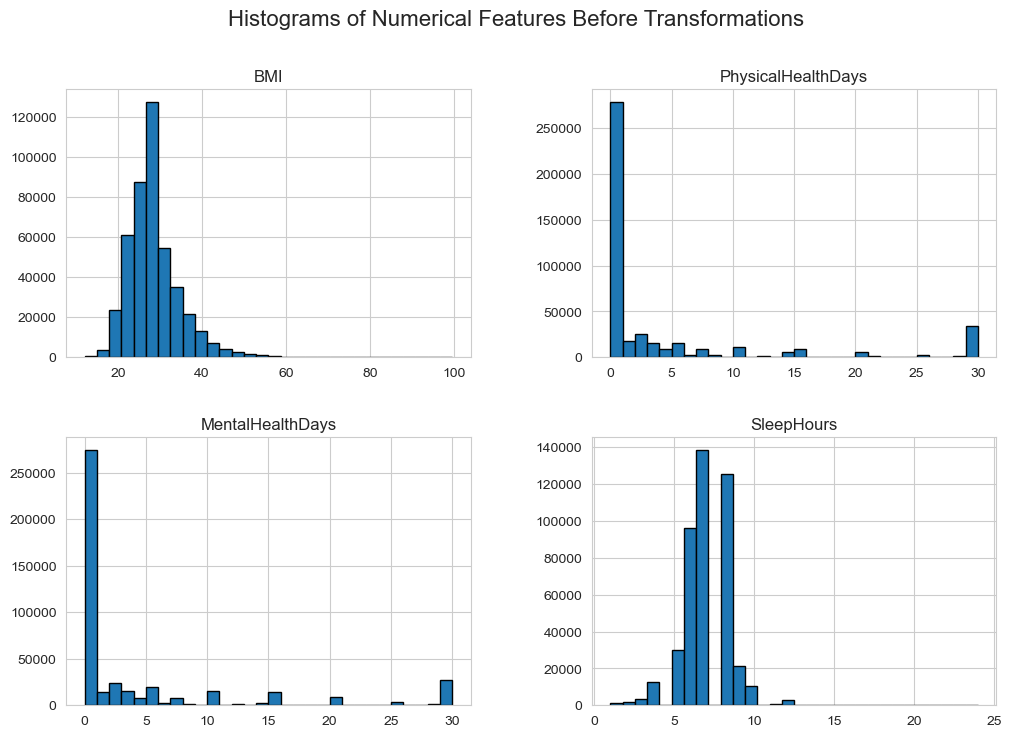

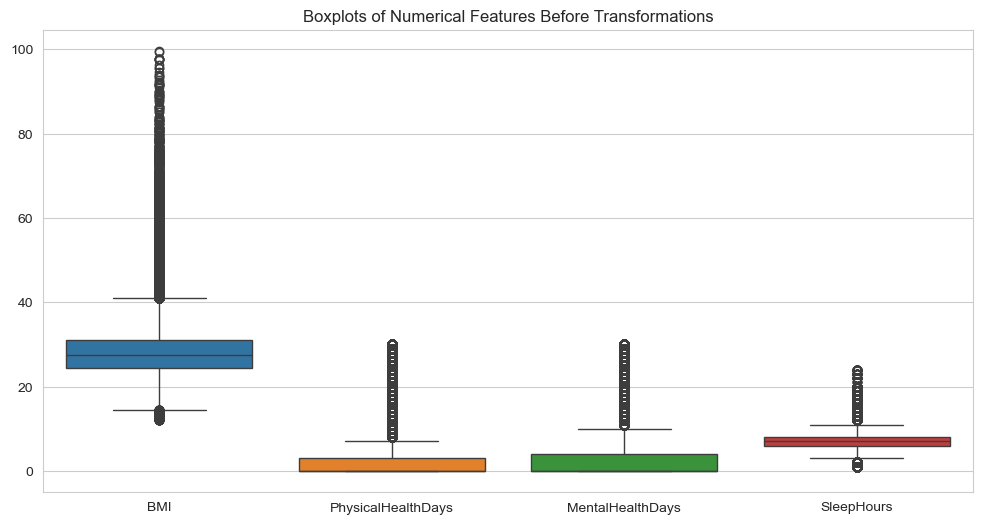

In [44]:
# Creating a copy of the dataset to avoid modifying the original one.
df_transformed = df_cleaned.copy()

# Lets Visualized the Distributions using Histograms & Boxplots to Detect Outliers
# Define numerical features of interest
numerical_features = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']

# Plot histograms
plt.figure(figsize=(12, 8))
df_transformed[numerical_features].hist(bins=30, edgecolor='black', figsize=(12, 8))
plt.suptitle("Histograms of Numerical Features Before Transformations", fontsize=16)
plt.show()

# Plot boxplots for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_transformed[numerical_features])
plt.title("Boxplots of Numerical Features Before Transformations")
plt.show()


<Figure size 1200x800 with 0 Axes>

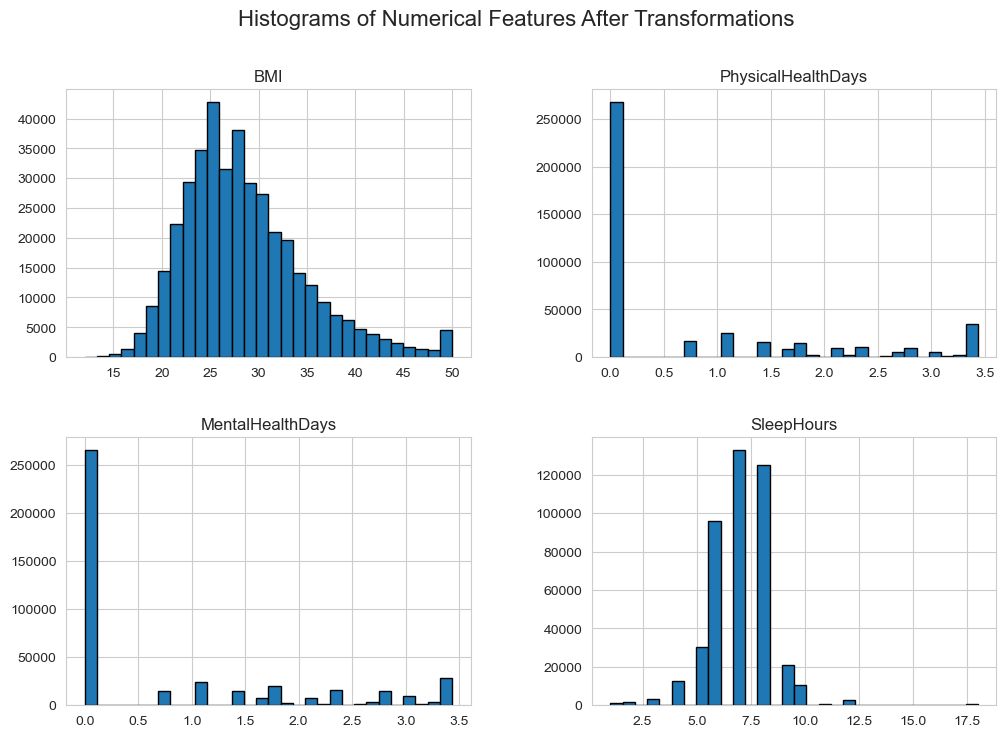

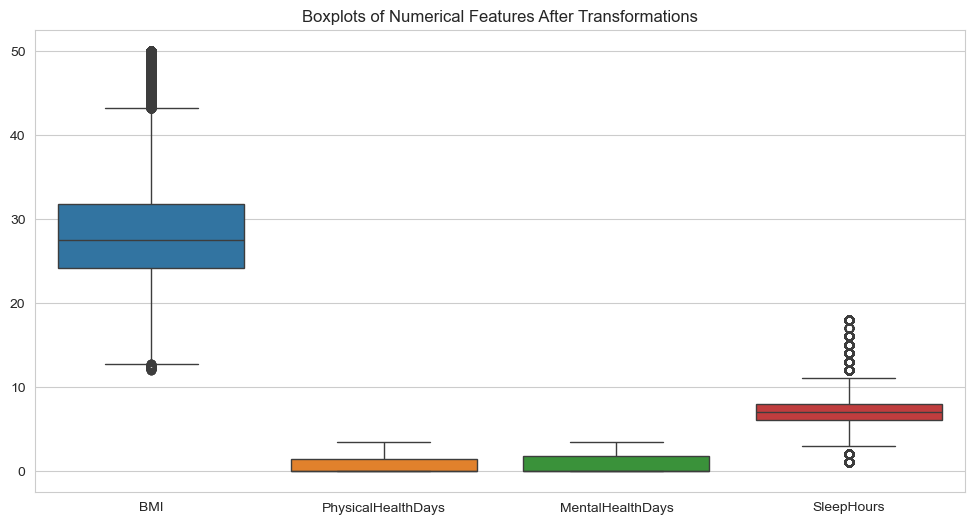

In [55]:

# Performing Log Transformations on Skewed Features
df_transformed['PhysicalHealthDays'] = np.log1p(df_transformed['PhysicalHealthDays'])  # log(1 + x)
df_transformed['MentalHealthDays'] = np.log1p(df_transformed['MentalHealthDays'])

# Cap Extreme Values for BMI & SleepHours
df_transformed['BMI'] = df_transformed['BMI'].clip(upper=50)  # Cap BMI at 50
df_transformed['SleepHours'] = df_transformed['SleepHours'].clip(upper=18)  # Cap SleepHours at 18

# Visualize distributions after transformation
plt.figure(figsize=(12, 8))
df_transformed[numerical_features].hist(bins=30, edgecolor='black', figsize=(12, 8))
plt.suptitle("Histograms of Numerical Features After Transformations", fontsize=16)
plt.show()

# Plot boxplots after transformations
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_transformed[numerical_features])
plt.title("Boxplots of Numerical Features After Transformations")
plt.show()


In [45]:
# Checking skewness
skewness = df[numerical_features].skew()
print(skewness)

# Applying log transformation to highly skewed columns (if needed)
for col in numerical_features:
    if skewness[col] > 1:  # Only apply to highly skewed features
        df[f"log_{col}"] = np.log1p(df[col])



BMI                   1.520955
PhysicalHealthDays    2.220360
MentalHealthDays      2.156032
SleepHours            0.770005
dtype: float64


In [46]:
# Cap BMI at 50
df['BMI'] = df['BMI'].apply(lambda x: 50 if x > 50 else x)


In [47]:

# Creating a copy of the dataset to avoid overwriting the original
df_transformed = df_cleaned.copy()

# Cap BMI at 50
df_transformed['BMI'] = df_transformed['BMI'].clip(upper=50)

# Log-transform PhysicalHealthDays & MentalHealthDays
df_transformed['PhysicalHealthDays'] = np.log1p(df_transformed['PhysicalHealthDays'])  # log(1 + x)
df_transformed['MentalHealthDays'] = np.log1p(df_transformed['MentalHealthDays'])      # log(1 + x)

print(df_transformed.head())  # Show the first few rows to verify the transformations



     BMI HadDiabetes                           SmokerStatus  \
0  27.44         Yes                           Never smoked   
1  26.57          No                           Never smoked   
2  25.61          No                           Never smoked   
3  23.30          No  Current smoker - now smokes some days   
4  21.77          No                           Never smoked   

  PhysicalActivities AlcoholDrinkers      AgeCategory     Sex GeneralHealth  \
0                 No              No  Age 80 or older  Female     Very good   
1                 No              No  Age 80 or older  Female     Excellent   
2                Yes              No     Age 55 to 59  Female     Very good   
3                Yes              No              NaN  Female     Excellent   
4                Yes             Yes     Age 40 to 44  Female          Fair   

   PhysicalHealthDays  MentalHealthDays  SleepHours HadHeartAttack HadAngina  \
0            0.000000          0.000000         8.0             No

In [77]:
df= pd.read_csv(r'C:/Users/amban/ANA500/heart_2022_with_nans.csv', header = 0)

Updated Outlier Analysis

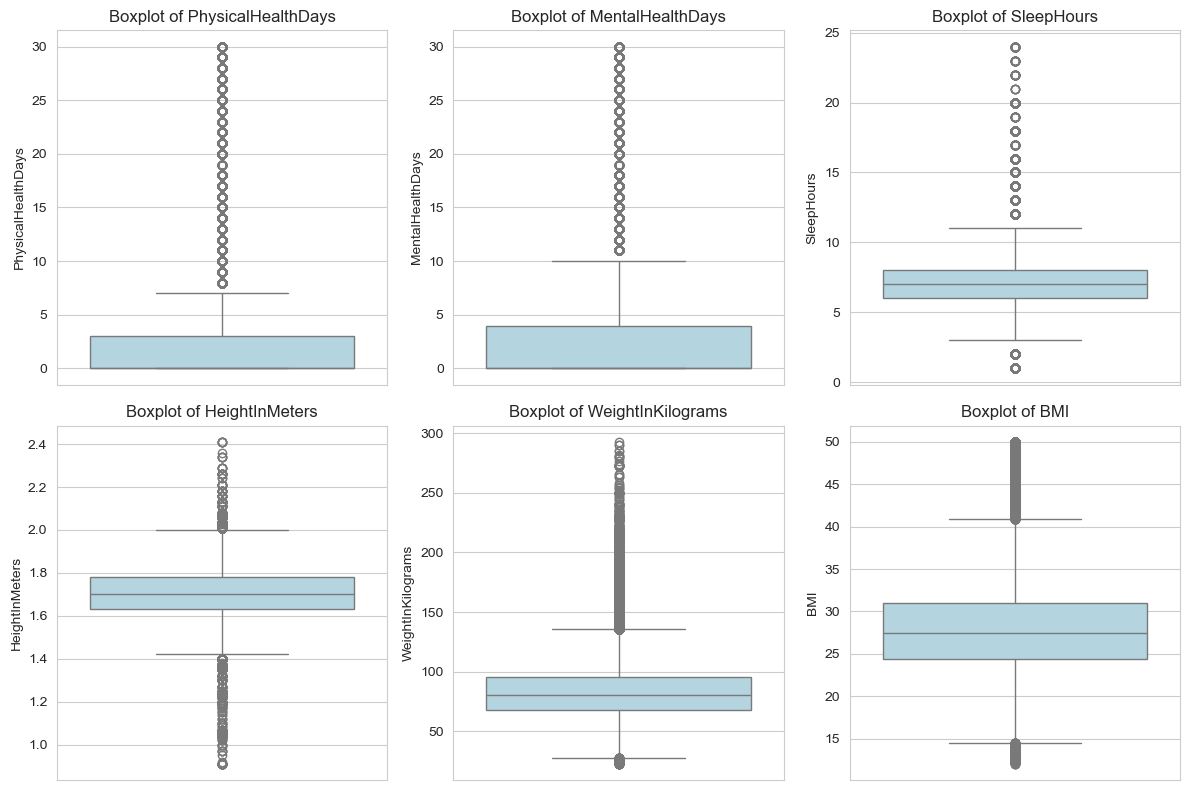

Updated Outliers DataFrame:
              Feature  Outlier Count
0  PhysicalHealthDays          72268
1    MentalHealthDays          61769
2          SleepHours           7260
3      HeightInMeters           1556
4   WeightInKilograms           9643
5                 BMI          19007


In [51]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical columns for outlier analysis
numerical_columns = ["PhysicalHealthDays", "MentalHealthDays", "SleepHours", "HeightInMeters", "WeightInKilograms", "BMI"]

# Creating subplots to visualize outliers using boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Identifying outliers using Interquartile Range (IQR)
outliers = {}
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    outliers[col] = outlier_count

# Creating a DataFrame from outlier counts
outliers_df_updated = pd.DataFrame(list(outliers.items()), columns=["Feature", "Outlier Count"])

# Print the updated outliers DataFrame
print("Updated Outliers DataFrame:")
print(outliers_df_updated)


In [53]:
# Identify outliers using Interquartile Range (IQR) and store bounds
outliers_data = []

for col in numerical_columns:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()

        # Store results
        outliers_data.append([col, outlier_count, lower_bound, upper_bound])

# Creating a DataFrame with outlier counts and bounds
outliers_df_updated = pd.DataFrame(outliers_data, columns=["Feature", "Outlier Count", "Lower Bound", "Upper Bound"])

# Print the updated outliers DataFrame
print("Updated Outliers DataFrame with Bounds:")
print(outliers_df_updated)

# Apply capping to the dataset
df_capped = df.copy()

for _, row in outliers_df_updated.iterrows():
    feature = row["Feature"]
    lower_bound = row["Lower Bound"]
    upper_bound = row["Upper Bound"]

    # Apply capping
    df_capped[feature] = np.where(df_capped[feature] < lower_bound, lower_bound, df_capped[feature])
    df_capped[feature] = np.where(df_capped[feature] > upper_bound, upper_bound, df_capped[feature])

# Print confirmation message
print("\nOutliers successfully capped at lower and upper bounds.")


Updated Outliers DataFrame with Bounds:
              Feature  Outlier Count  Lower Bound  Upper Bound
0  PhysicalHealthDays          72268       -4.500        7.500
1    MentalHealthDays          61769       -6.000       10.000
2          SleepHours           7260        3.000       11.000
3      HeightInMeters           1556        1.405        2.005
4   WeightInKilograms           9643       27.225      136.065
5                 BMI          19007       14.510       40.910

Outliers successfully capped at lower and upper bounds.


In [54]:
# Import necessary library
import numpy as np

# Apply capping to the dataset
df_capped = df.copy()

for _, row in outliers_df_updated.iterrows():
    feature = row["Feature"]
    lower_bound = row["Lower Bound"]
    upper_bound = row["Upper Bound"]

    # Apply capping
    df_capped[feature] = np.where(df_capped[feature] < lower_bound, lower_bound, df_capped[feature])
    df_capped[feature] = np.where(df_capped[feature] > upper_bound, upper_bound, df_capped[feature])

# Print confirmation message
print("\n Outliers successfully capped at lower and upper bounds!")



 Outliers successfully capped at lower and upper bounds!


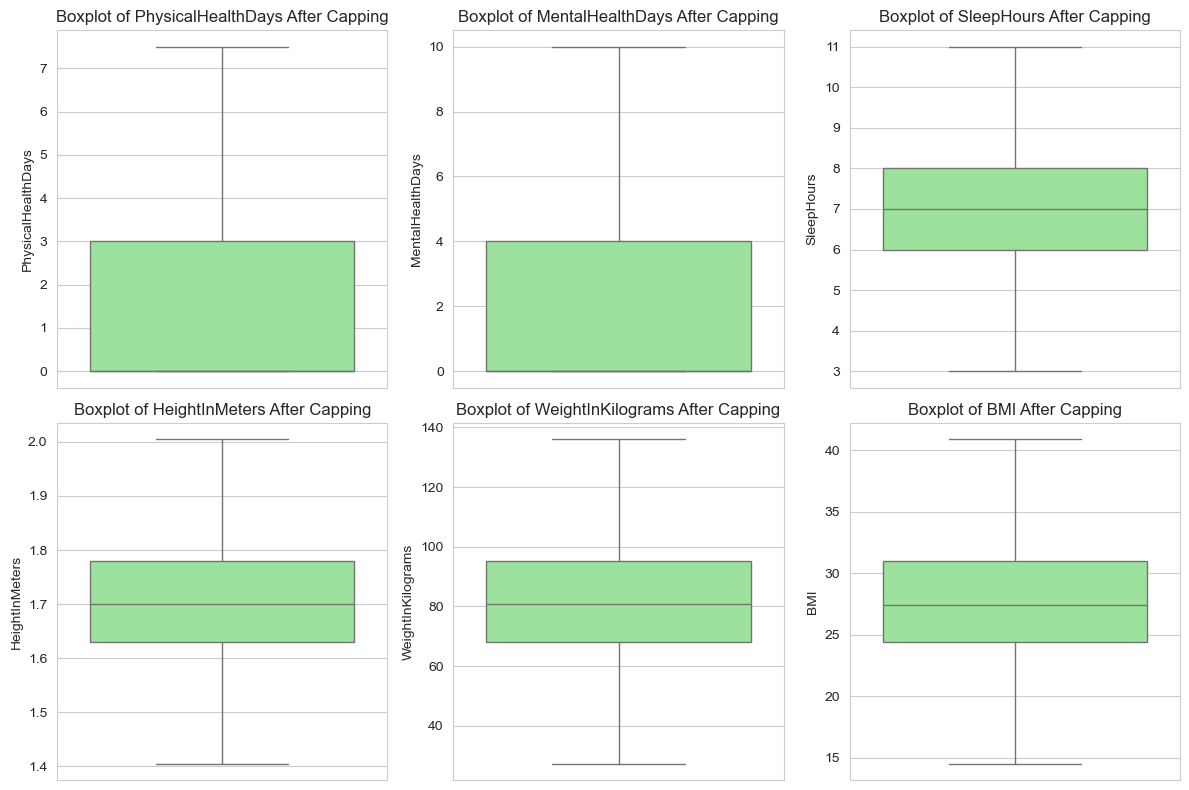

       PhysicalHealthDays  MentalHealthDays     SleepHours  HeightInMeters  \
count       444975.000000     444975.000000  444975.000000   416470.000000   
mean             1.907305          2.465291       7.006517        1.702819   
std              2.912990          3.819853       1.350749        0.106024   
min              0.000000          0.000000       3.000000        1.405000   
25%              0.000000          0.000000       6.000000        1.630000   
50%              0.000000          0.000000       7.000000        1.700000   
75%              3.000000          4.000000       8.000000        1.780000   
max              7.500000         10.000000      11.000000        2.005000   

       WeightInKilograms            BMI  
count      403044.000000  444975.000000  
mean           82.721542      28.170446  
std            20.205894       5.408670  
min            27.225000      14.510000  
25%            68.040000      24.410000  
50%            80.740000      27.440000  
75%

In [56]:
# Applying capping for outliers based on the calculated IQR bounds

# Creating a copy of the dataset to preserve the original
df_capped = df.copy()

# Capping outliers using the IQR method
for col, lower_bound, upper_bound in zip(outliers_df_updated["Feature"], 
                                         outliers_df_updated["Lower Bound"], 
                                         outliers_df_updated["Upper Bound"]):
    # Capping values below the lower bound
    df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound, df_capped[col])
    # Capping values above the upper bound
    df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col])

# Verifying if outliers were successfully capped by re-running the boxplot visualization
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_capped[col], color='lightgreen')
    plt.title(f'Boxplot of {col} After Capping')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Checking summary statistics after capping
updated_summary = df_capped[numerical_columns].describe()

# Printing the updated summary statistics
print(updated_summary)

In [58]:

# Load the dataset
df= pd.read_csv(r'C:/Users/amban/ANA500/heart_2022_with_nans.csv', header = 0)

# Selecting relevant numerical features
numerical_features = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']

# Drop rows with missing values in selected numerical features
df = df.dropna(subset=numerical_features)

# Compute skewness before transformation
skewness_before = df[numerical_features].skew()

# Apply Log Transformation on highly skewed features
df['log_BMI'] = np.log1p(df['BMI'])
df['log_PhysicalHealthDays'] = np.log1p(df['PhysicalHealthDays'])
df['log_MentalHealthDays'] = np.log1p(df['MentalHealthDays'])

# Drop any potential NaNs in transformed columns before recalculating skewness
df = df.dropna(subset=['log_BMI', 'log_PhysicalHealthDays', 'log_MentalHealthDays'])

# Compute skewness after transformation
transformed_features = ['log_BMI', 'log_PhysicalHealthDays', 'log_MentalHealthDays']
skewness_after = df[transformed_features].skew()

# Create a DataFrame to compare skewness before and after transformation
skewness_comparison = pd.DataFrame({'Before Transformation': skewness_before, 'After Transformation': skewness_after})
skewness_comparison = skewness_comparison.loc[['BMI', 'PhysicalHealthDays', 'MentalHealthDays']]  # Excluding SleepHours

# Print the skewness comparison
print("Skewness Comparison Before and After Log Transformation:\n")
print(skewness_comparison.to_string(index=True))


Skewness Comparison Before and After Log Transformation:

                    Before Transformation  After Transformation
BMI                              1.377582                   NaN
PhysicalHealthDays               2.197777                   NaN
MentalHealthDays                 2.123549                   NaN


In [59]:
# Lets check the data types of the transformed columns
transformed_dtypes = df[['log_BMI', 'log_PhysicalHealthDays', 'log_MentalHealthDays']].dtypes

# Checking for NaN values in transformed columns
missing_values = df[['log_BMI', 'log_PhysicalHealthDays', 'log_MentalHealthDays']].isna().sum()

# Print data types and missing values to diagnose the issue
print("Data Types of Transformed Columns:\n", transformed_dtypes)
print("\nMissing Values in Transformed Columns:\n", missing_values)


Data Types of Transformed Columns:
 log_BMI                   float64
log_PhysicalHealthDays    float64
log_MentalHealthDays      float64
dtype: object

Missing Values in Transformed Columns:
 log_BMI                   0
log_PhysicalHealthDays    0
log_MentalHealthDays      0
dtype: int64


In [61]:
# Recalculating skewness after transformation using the correct column references
skewness_after = df[['log_BMI', 'log_PhysicalHealthDays', 'log_MentalHealthDays']].skew()

# Creating a DataFrame for skewness comparison
skewness_comparison_corrected = pd.DataFrame({
    'Before Transformation': skewness_before.loc[['BMI', 'PhysicalHealthDays', 'MentalHealthDays']],
    'After Transformation': skewness_after.values  # Ensure values align correctly
})

# Print the corrected skewness comparison
print("Corrected Skewness Comparison Before and After Log Transformation:\n")
print(skewness_comparison_corrected.to_string(index=True))


Corrected Skewness Comparison Before and After Log Transformation:

                    Before Transformation  After Transformation
BMI                              1.377582              0.461664
PhysicalHealthDays               2.197777              1.162265
MentalHealthDays                 2.123549              1.044546


<Figure size 1200x600 with 0 Axes>

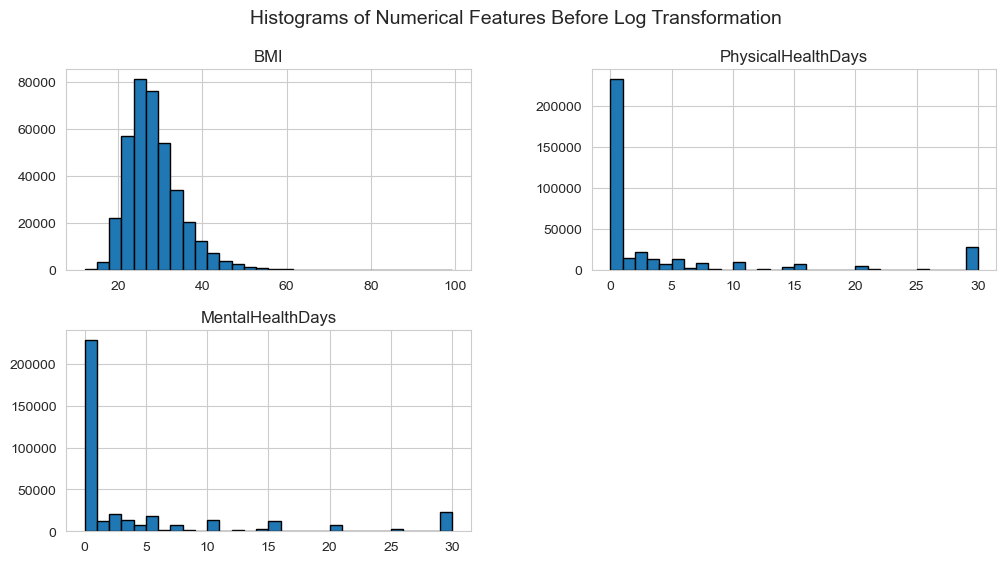

<Figure size 1200x600 with 0 Axes>

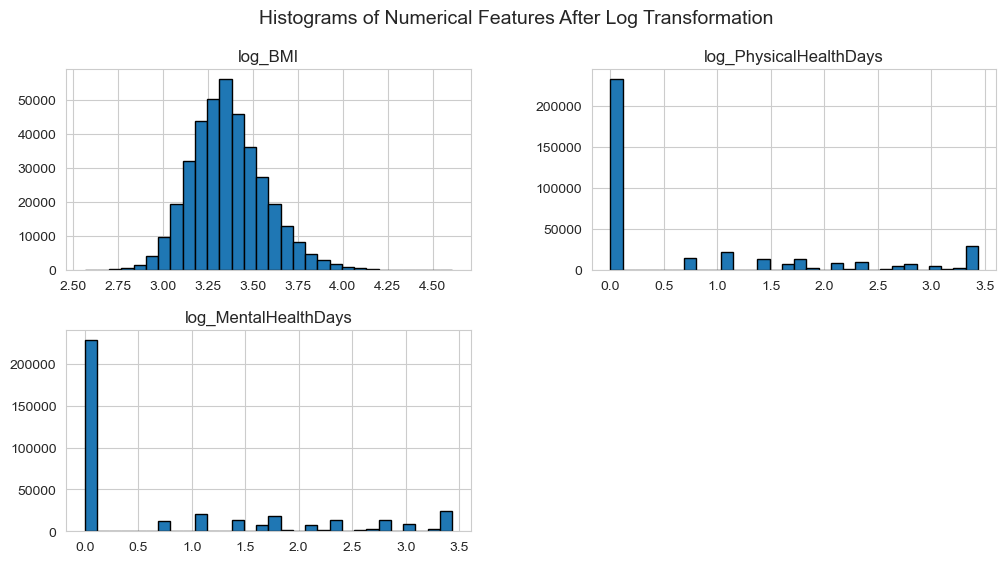

In [62]:
# Visualizing histograms before and after log transformation

# Lets set the figure size
plt.figure(figsize=(12, 6))

# Plot histograms before transformation
df[['BMI', 'PhysicalHealthDays', 'MentalHealthDays']].hist(bins=30, edgecolor='black', figsize=(12, 6))
plt.suptitle("Histograms of Numerical Features Before Log Transformation", fontsize=14)
plt.show()

# Setting the figure size for the transformed features
plt.figure(figsize=(12, 6))

# Plotting histograms after transformation
df[['log_BMI', 'log_PhysicalHealthDays', 'log_MentalHealthDays']].hist(bins=30, edgecolor='black', figsize=(12, 6))
plt.suptitle("Histograms of Numerical Features After Log Transformation", fontsize=14)
plt.show()


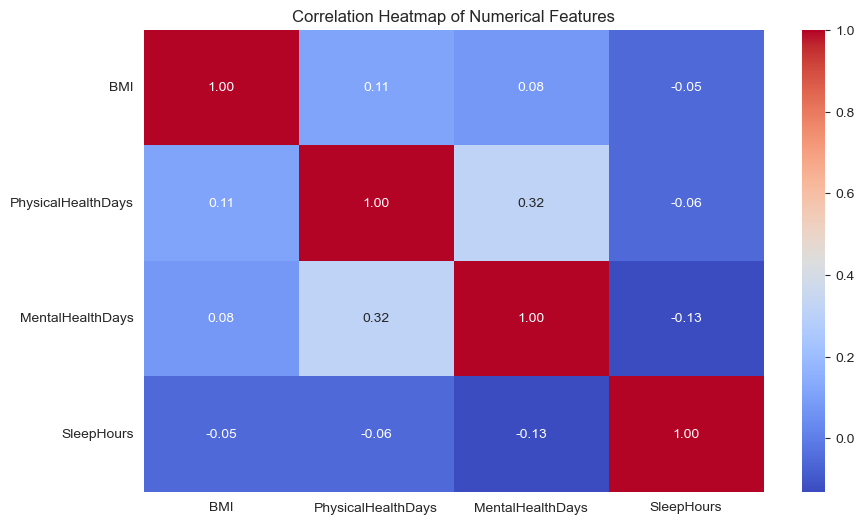

In [63]:
# Computing correlation matrix without "Heart Diseae"
correlation_matrix = df[numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [64]:
# Verifying any discrepancy
# Load the dataset
df= pd.read_csv(r'C:/Users/amban/ANA500/heart_2022_with_nans.csv', header = 0)

# Print all column names to check for discrepancies
print("Available Columns in Dataset:\n")
print(df.columns.tolist())

Available Columns in Dataset:

['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']


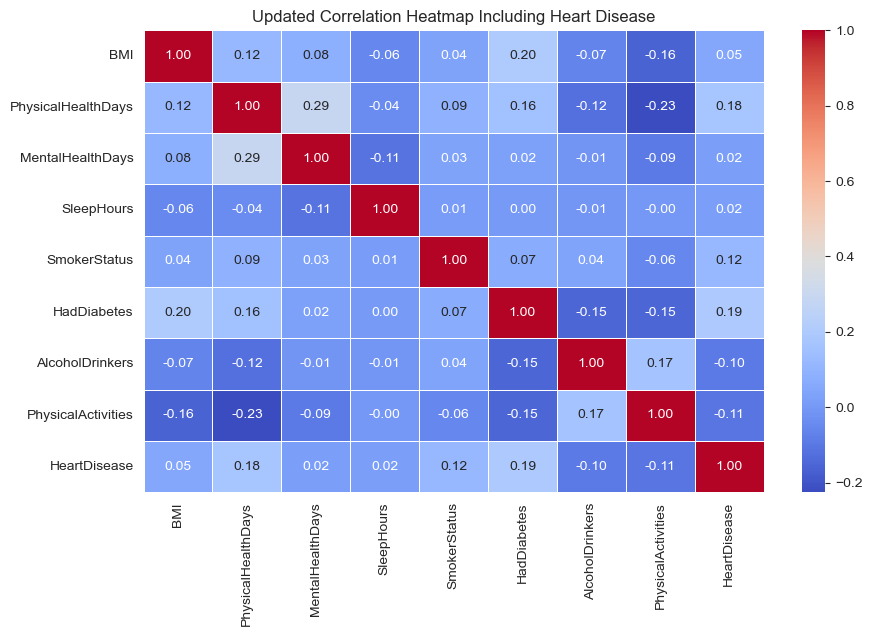

In [65]:
# Heatmap with Heart Disease 
# Select relevant numerical and categorical features
features = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
            'SmokerStatus', 'HadDiabetes', 'AlcoholDrinkers', 'PhysicalActivities', 
            'HadHeartAttack', 'HadAngina', 'HadStroke']

# Keeping only the relevant columns
df = df[features]

# Handling missing values by filling numerical columns with mean/median
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['PhysicalHealthDays'].fillna(df['PhysicalHealthDays'].median(), inplace=True)
df['MentalHealthDays'].fillna(df['MentalHealthDays'].median(), inplace=True)
df['SleepHours'].fillna(df['SleepHours'].mean(), inplace=True)

# Correcting categorical mapping for SmokerStatus
df['SmokerStatus'] = df['SmokerStatus'].map({
    'Yes': 1,  # Current smoker
    'No': 0,   # Never smoked
    'Never smoked': 0,  # Treat "Never smoked" same as "No"
    'Former smoker': 0.5  # Assign 0.5 for former smokers (moderate risk)
})

# Fix categorical mappings, including expanded 'HadDiabetes' categories
categorical_mappings = {
    'HadDiabetes': {
        'Yes': 1,
        'No': 0,
        'No, pre-diabetes or borderline diabetes': 0.5,
        'Yes, but only during pregnancy (female)': 0  # Treat as temporary, so 0
    },
    'AlcoholDrinkers': {'Yes': 1, 'No': 0},
    'PhysicalActivities': {'Yes': 1, 'No': 0},
    'HadHeartAttack': {'Yes': 1, 'No': 0},
    'HadAngina': {'Yes': 1, 'No': 0},
    'HadStroke': {'Yes': 1, 'No': 0}
}

df.replace(categorical_mappings, inplace=True)

# Ensuring no missing values is left
df.dropna(inplace=True)

# Creating a new "HeartDisease" column (1 if HadHeartAttack, HadAngina, or HadStroke is 1, otherwise 0)
df['HeartDisease'] = ((df['HadHeartAttack'] == 1) | 
                      (df['HadAngina'] == 1) | 
                      (df['HadStroke'] == 1)).astype(int)

# Dropping the individual heart disease-related columns since they are combined into "HeartDisease"
df.drop(columns=['HadHeartAttack', 'HadAngina', 'HadStroke'], inplace=True)

# Finally, computing correlation matrix
correlation_matrix = df.corr()

# Plotting the updated correlation heatmap including the new "HeartDisease" column


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Updated Correlation Heatmap Including Heart Disease")
plt.show()


In [78]:
existing_categorical_features = [col for col in categorical_features if col in df.columns]


In [79]:
print("Existing Columns in Dataset:", df.columns.tolist())


Existing Columns in Dataset: ['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']


In [82]:
print(df[['GeneralHealth', 'RaceEthnicityCategory', 'AgeCategory', 'Sex']].dtypes)
print(df[['GeneralHealth', 'RaceEthnicityCategory', 'AgeCategory', 'Sex']].isnull().sum())


GeneralHealth            object
RaceEthnicityCategory    object
AgeCategory              object
Sex                      object
dtype: object
GeneralHealth             1198
RaceEthnicityCategory    14057
AgeCategory               9079
Sex                          0
dtype: int64


In [83]:
for col in ['GeneralHealth', 'RaceEthnicityCategory', 'AgeCategory', 'Sex']:
    df[col] = df[col].astype(str)

In [84]:
df[['GeneralHealth', 'RaceEthnicityCategory', 'AgeCategory', 'Sex']] = df[['GeneralHealth', 'RaceEthnicityCategory', 'AgeCategory', 'Sex']].apply(lambda x: x.str.strip())


In [85]:
for col in ['GeneralHealth', 'RaceEthnicityCategory', 'AgeCategory', 'Sex']:
    print(f"{col} unique values: {df[col].nunique()}")


GeneralHealth unique values: 6
RaceEthnicityCategory unique values: 6
AgeCategory unique values: 14
Sex unique values: 2


In [86]:
print("Features being plotted:", existing_categorical_features)


Features being plotted: ['HadDiabetes', 'SmokerStatus', 'PhysicalActivities', 'AlcoholDrinkers', 'AgeCategory', 'Sex', 'GeneralHealth', 'RaceEthnicityCategory']


In [89]:
# Fix 1: Fill missing values with "Unknown" for GeneralHealth, RaceEthnicityCategory, and AgeCategory
df[['GeneralHealth', 'RaceEthnicityCategory', 'AgeCategory']] = df[['GeneralHealth', 'RaceEthnicityCategory', 'AgeCategory']].fillna("Unknown")

# Fix 2: Trim whitespace from categorical features to avoid formatting issues
df[['GeneralHealth', 'RaceEthnicityCategory', 'AgeCategory', 'Sex']] = df[['GeneralHealth', 'RaceEthnicityCategory', 'AgeCategory', 'Sex']].apply(lambda x: x.str.strip())

# Fix 3: Print unique values for RaceEthnicityCategory and AgeCategory (to check for excessive categories)
print("Unique Values in RaceEthnicityCategory:")
print(df['RaceEthnicityCategory'].value_counts())

print("\n Unique Values in AgeCategory:")
print(df['AgeCategory'].value_counts())

# Fix 4: Generate updated categorical feature distributions

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical features again
categorical_features = ['HadDiabetes', 'SmokerStatus', 'PhysicalActivities', 'AlcoholDrinkers', 
                        'AgeCategory', 'Sex', 'GeneralHealth', 'RaceEthnicityCategory']

# Ensure categorical columns exist before plotting
existing_categorical_features = [col for col in categorical_features if col in df.columns]

# Generate categorical feature distributions
plt.figure(figsize=(14, 10))  # Adjusted size for better spacing

for i, col in enumerate(existing_categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout(pad=2.0)  # Adjust padding to reduce overlap
plt.show()


Unique Values in RaceEthnicityCategory:
RaceEthnicityCategory
White only, Non-Hispanic         320421
Hispanic                          42917
Black only, Non-Hispanic          35446
Other race only, Non-Hispanic     22713
nan                               14057
Multiracial, Non-Hispanic          9578
Name: count, dtype: int64

 Unique Values in AgeCategory:
AgeCategory
Age 65 to 69       47099
Age 60 to 64       44511
Age 70 to 74       43472
Age 55 to 59       36821
Age 80 or older    36251
Age 50 to 54       33644
Age 75 to 79       32518
Age 40 to 44       29942
Age 45 to 49       28531
Age 35 to 39       28526
Age 18 to 24       26941
Age 30 to 34       25807
Age 25 to 29       21990
nan                 9079
Name: count, dtype: int64


In [90]:
# Process missing values column by column to reduce memory usage
for col in ['GeneralHealth', 'RaceEthnicityCategory', 'AgeCategory']:
    df[col].fillna("Unknown", inplace=True)  # Fill missing values

# Trim whitespace for categorical features
for col in ['GeneralHealth', 'RaceEthnicityCategory', 'AgeCategory', 'Sex']:
    df[col] = df[col].astype(str).str.strip()

# Print confirmation message
print("Missing values handled efficiently, and categorical features are cleaned.")


Missing values handled efficiently, and categorical features are cleaned.


In [92]:
# Convert categorical columns to a more memory-efficient 'category' dtype
for col in ['GeneralHealth', 'RaceEthnicityCategory', 'AgeCategory', 'Sex']:
    df[col] = df[col].astype('category')  # Convert to category dtype to reduce memory usage

# Print confirmation message
print("Categorical features successfully converted to category dtype for memory efficiency.")


Categorical features successfully converted to category dtype for memory efficiency.


In [100]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df= pd.read_csv(r'C:/Users/amban/ANA500/heart_2022_with_nans.csv', header = 0)

# Define categorical features for histogram plotting
categorical_features = ['HadDiabetes', 'SmokerStatus', 'PhysicalActivities', 'AlcoholDrinkers', 
                        'AgeCategory', 'Sex', 'GeneralHealth', 'RaceEthnicityCategory']

# Check if these columns exist in the dataset
existing_categorical_features = [col for col in categorical_features if col in df.columns]
missing_features = [col for col in categorical_features if col not in df.columns]

# Print existing and missing features
print("Existing Features:", existing_categorical_features)
print("Missing Features:", missing_features)

# Convert categorical columns to string type to avoid potential plotting issues
df[existing_categorical_features] = df[existing_categorical_features].astype(str)

# Reduce dataset size for visualization to prevent memory issues
df_subset = df.sample(n=5000, random_state=42)

# Generate bar plots for categorical feature distributions (handling memory limits)
plt.figure(figsize=(14, 10))

for i, col in enumerate(existing_categorical_features, 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid
    sns.countplot(data=df_subset, x=col, palette="viridis")  # Use Seaborn for consistent styling
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45, ha="right")  # Adjust text rotation for better readability

plt.tight_layout(pad=2.0)  # Adjust padding to reduce overlap
plt.show()


Existing Features: ['HadDiabetes', 'SmokerStatus', 'PhysicalActivities', 'AlcoholDrinkers', 'AgeCategory', 'Sex', 'GeneralHealth', 'RaceEthnicityCategory']
Missing Features: []


In [93]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of categorical features
categorical_features = ['HadDiabetes', 'SmokerStatus', 'PhysicalActivities', 'AlcoholDrinkers', 
                        'AgeCategory', 'Sex', 'GeneralHealth', 'RaceEthnicityCategory']

# Check which categorical columns exist in the dataset
existing_categorical_features = [col for col in categorical_features if col in df.columns]

# Print missing categorical features (if any)
missing_categorical_features = [col for col in categorical_features if col not in df.columns]
if missing_categorical_features:
    print("The following categorical features are missing and won't be plotted:", missing_categorical_features)

# Plot bar charts only for existing categorical features
plt.figure(figsize=(12, 10))
for i, col in enumerate(existing_categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


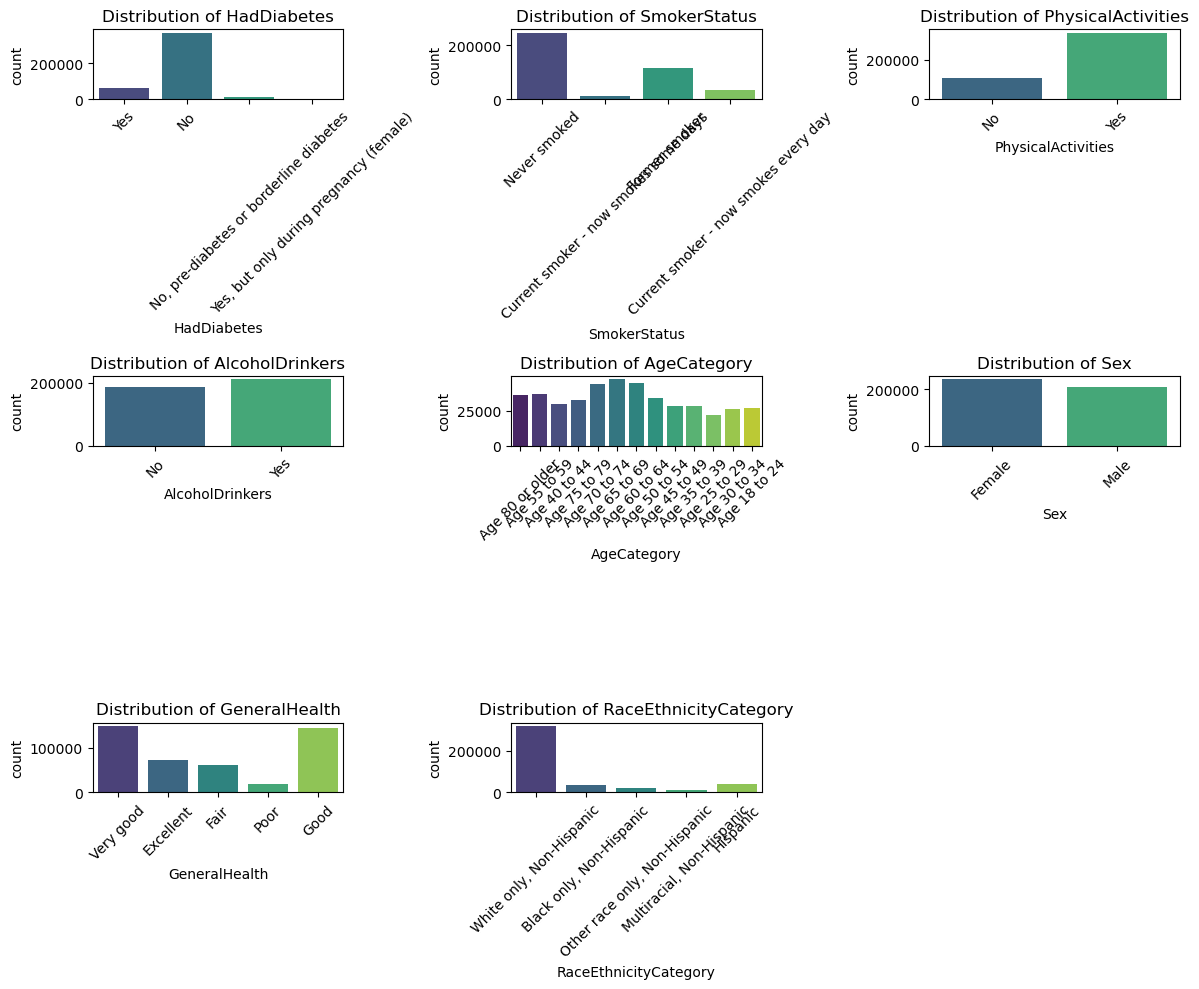

In [5]:
#Categorical Feature Distributions

# List of categorical features
categorical_features = ['HadDiabetes', 'SmokerStatus', 'PhysicalActivities', 'AlcoholDrinkers', 
                        'AgeCategory', 'Sex', 'GeneralHealth', 'RaceEthnicityCategory']

# Plotting bar charts for categorical features
plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


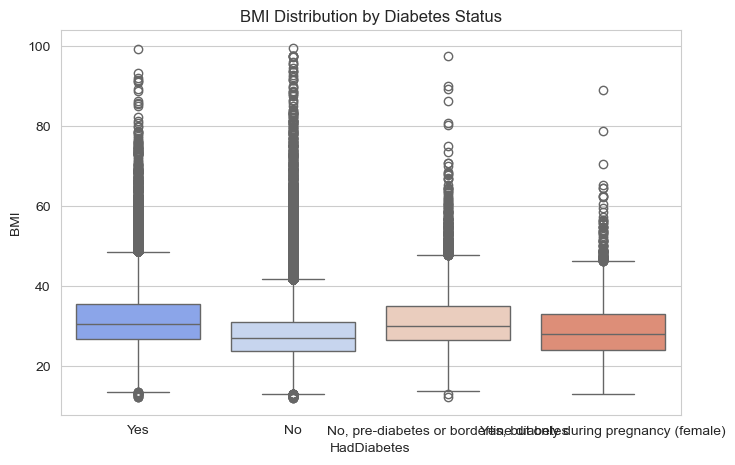

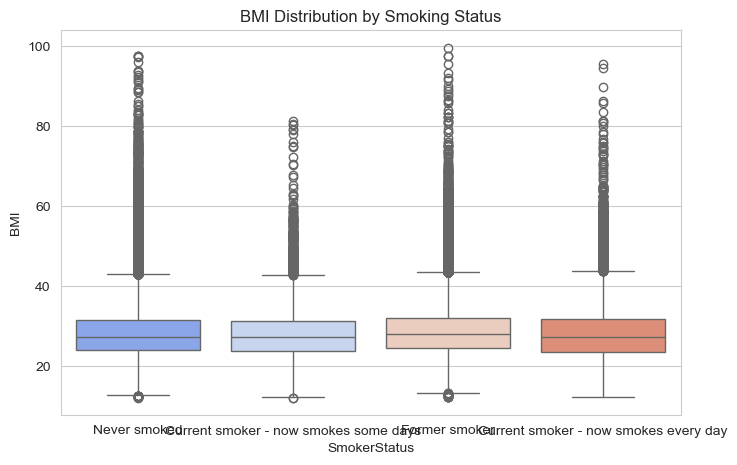

In [86]:
# Boxplot of BMI across Diabetes status
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['HadDiabetes'], y=df['BMI'], palette="coolwarm")
plt.title("BMI Distribution by Diabetes Status")
plt.show()

# Boxplot of BMI across Smoking status
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['SmokerStatus'], y=df['BMI'], palette="coolwarm")
plt.title("BMI Distribution by Smoking Status")
plt.show()


Chi-Square and ANOVA Test Results, Variance Inflation Factor  Results

In [90]:
# Printing all column names to check for discrepancies
print("Available Columns in Dataset:\n")
print(df.columns.tolist())


Available Columns in Dataset:

['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'SmokerStatus', 'HadDiabetes', 'AlcoholDrinkers', 'PhysicalActivities', 'HeartDisease', 'TotalHealthRisk']


In [91]:
# Chi-Square Test, ANOVA (F-test) and Multicollinearity Check


#  Chi-Square Test for Categorical Variables vs. Heart Disease
categorical_features = ['SmokerStatus', 'HadDiabetes', 'AlcoholDrinkers', 'PhysicalActivities']
chi2_results = {}

for col in categorical_features:
    contingency_table = pd.crosstab(df[col], df['HeartDisease'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    chi2_results[col] = {'Chi2 Statistic': chi2, 'p-value': p}

chi2_df = pd.DataFrame(chi2_results).T

# ANOVA (F-test) for Continuous Variables vs. Heart Disease
continuous_features = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'TotalHealthRisk']
anova_results = {}

for col in continuous_features:
    group0 = df[df['HeartDisease'] == 0][col]  # No heart disease
    group1 = df[df['HeartDisease'] == 1][col]  # Has heart disease
    f_stat, p_value = stats.f_oneway(group0, group1)
    anova_results[col] = {'F-Statistic': f_stat, 'p-value': p_value}

anova_df = pd.DataFrame(anova_results).T

# Multicollinearity Check using Variance Inflation Factor (VIF)
numerical_features = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'TotalHealthRisk']
X = df[numerical_features]
X['Intercept'] = 1  # Add intercept for VIF calculation

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop intercept after calculation
vif_data = vif_data[vif_data['Feature'] != 'Intercept']

print("\n### Chi-Square Test Results ###")
print(chi2_df.to_string())

print("\n### ANOVA Test Results ###")
print(anova_df.to_string())

print("\n### Variance Inflation Factor (VIF) Results ###")
print(vif_data.to_string())


### Chi-Square Test Results ###
                    Chi2 Statistic  p-value
SmokerStatus           4705.569011      0.0
HadDiabetes           12933.067588      0.0
AlcoholDrinkers        3485.150989      0.0
PhysicalActivities     4581.985492      0.0

### ANOVA Test Results ###
                     F-Statistic        p-value
BMI                   729.162476  1.995682e-160
PhysicalHealthDays  12793.289571   0.000000e+00
MentalHealthDays      425.019555   2.245758e-94
SleepHours             94.587164   2.360751e-22
TotalHealthRisk      6875.274984   0.000000e+00

### Variance Inflation Factor (VIF) Results ###
              Feature       VIF
0                 BMI  1.017278
1  PhysicalHealthDays       inf
2    MentalHealthDays       inf
3          SleepHours  1.019382
4     TotalHealthRisk       inf


In [ ]:
# Dropping redundant features (PhysicalHealthDays & MentalHealthDays)
df.drop(columns=['PhysicalHealthDays', 'MentalHealthDays'], inplace=True)

# Verifying updated dataset columns
updated_columns = df.columns.tolist()
updated_columns

In [106]:
!pip install shap


   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
   ----- ---------------------------------- 61.4/456.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------  450.6/456.2 kB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 456.2/456.2 kB 4.8 MB/s eta 0:00:00


In [ ]:
df= pd.read_csv(r'C:/Users/amban/ANA500/heart_2022_with_nans.csv', header = 0)

In [11]:
import os

file_path = r"C:/Users/amban/ANA500/heart_2022_with_nans.csv"

# Check if the file exists
if os.path.exists(file_path):
    print("File found! ")
else:
    print("File not found. Check the file path.")


File found! 


In [12]:
import pandas as pd

df = pd.read_csv(r"C:/Users/amban/ANA500/heart_2022_with_nans.csv")
print(df.shape)  # Check dataset dimensions
print(df.head())  # Preview first few rows


(445132, 40)
     State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 0.0               0.0   
1  Alabama  Female     Excellent                 0.0               0.0   
2  Alabama  Female     Very good                 2.0               3.0   
3  Alabama  Female     Excellent                 0.0               0.0   
4  Alabama  Female          Fair                 2.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                 No   
1                                                NaN                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         8.0          NaN

In [13]:
# Define the 18 important columns
columns_to_keep = [
    'BMI', 'HadDiabetes', 'SmokerStatus', 'PhysicalActivities', 'AlcoholDrinkers',
    'AgeCategory', 'Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
    'SleepHours', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadCOPD',
    'HadDepressiveDisorder', 'HadArthritis', 'RaceEthnicityCategory'
]

# Keeping only the necessary columns
df_cleaned = df[columns_to_keep]

# Save the cleaned dataset locally
cleaned_file_path = r"C:/Users/amban/ANA500/cleaned_heart_disease_data.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)

print("Cleaned dataset saved successfully at:", cleaned_file_path)


Cleaned dataset saved successfully at: C:/Users/amban/ANA500/cleaned_heart_disease_data.csv


In [14]:
if os.path.exists(cleaned_file_path):
    print("Cleaned file found! ")
else:
    print("Cleaned file not found.  Check for errors.")


Cleaned file found! 


In [15]:
df_cleaned = pd.read_csv(cleaned_file_path)
print(df_cleaned.shape)  # Check dimensions
print(df_cleaned.head())  # Preview data


(445132, 18)
     BMI HadDiabetes                           SmokerStatus  \
0    NaN         Yes                           Never smoked   
1  26.57          No                           Never smoked   
2  25.61          No                           Never smoked   
3  23.30          No  Current smoker - now smokes some days   
4  21.77          No                           Never smoked   

  PhysicalActivities AlcoholDrinkers      AgeCategory     Sex GeneralHealth  \
0                 No              No  Age 80 or older  Female     Very good   
1                 No              No  Age 80 or older  Female     Excellent   
2                Yes              No     Age 55 to 59  Female     Very good   
3                Yes              No              NaN  Female     Excellent   
4                Yes             Yes     Age 40 to 44  Female          Fair   

   PhysicalHealthDays  MentalHealthDays  SleepHours HadHeartAttack HadAngina  \
0                 0.0               0.0         8.0  

In [21]:
print(X_train.columns)  # Check which features were used


Index(['BMI', 'HadDiabetes', 'SmokerStatus', 'PhysicalActivities',
       'AlcoholDrinkers', 'AgeCategory', 'Sex', 'GeneralHealth',
       'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HadAngina',
       'HadStroke', 'HadCOPD', 'HadDepressiveDisorder', 'HadArthritis',
       'RaceEthnicityCategory'],
      dtype='object')


In [18]:
columns_to_keep = [
    'BMI', 'HadDiabetes', 'SmokerStatus', 'PhysicalActivities', 'AlcoholDrinkers',
    'AgeCategory', 'Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
    'SleepHours', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadCOPD',
    'HadDepressiveDisorder', 'HadArthritis', 'RaceEthnicityCategory'
]

df_cleaned = df[columns_to_keep]

# Define features (X) and target (y)
X = df_cleaned.drop(columns=['HadHeartAttack'])  # Keep only predictors
y = df_cleaned['HadHeartAttack'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert target to binary


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [20]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns that need encoding
categorical_cols = [
    'HadDiabetes', 'SmokerStatus', 'PhysicalActivities', 'AlcoholDrinkers',
    'AgeCategory', 'Sex', 'GeneralHealth', 'RaceEthnicityCategory',
    'HadAngina', 'HadStroke', 'HadCOPD', 'HadDepressiveDisorder', 'HadArthritis'
]

# Apply Label Encoding to categorical variables
encoder = LabelEncoder()
for col in categorical_cols:
    df_cleaned[col] = encoder.fit_transform(df_cleaned[col])

# Now, re-define features (X) and target (y)
X = df_cleaned.drop(columns=['HadHeartAttack'])  # Features
y = df_cleaned['HadHeartAttack'].apply(lambda x: 1 if x == 'Yes' else 0)  # Target variable

# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [145]:
print(df_cleaned.isnull().sum())  # Check missing values per column


BMI                      48806
HadDiabetes                  0
SmokerStatus                 0
PhysicalActivities           0
AlcoholDrinkers              0
AgeCategory                  0
Sex                          0
GeneralHealth                0
PhysicalHealthDays       10927
MentalHealthDays          9067
SleepHours                5453
HadHeartAttack            3065
HadAngina                    0
HadStroke                    0
HadCOPD                      0
HadDepressiveDisorder        0
HadArthritis                 0
RaceEthnicityCategory        0
dtype: int64


In [22]:
from sklearn.impute import SimpleImputer

# List of numerical columns with missing values
numerical_cols = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']

# Impute numerical features using the median
num_imputer = SimpleImputer(strategy="median")
df_cleaned[numerical_cols] = num_imputer.fit_transform(df_cleaned[numerical_cols])

# Confirm all missing values are handled
print(df_cleaned.isnull().sum())  # Should print all zeros


BMI                         0
HadDiabetes                 0
SmokerStatus                0
PhysicalActivities          0
AlcoholDrinkers             0
AgeCategory                 0
Sex                         0
GeneralHealth               0
PhysicalHealthDays          0
MentalHealthDays            0
SleepHours                  0
HadHeartAttack           3065
HadAngina                   0
HadStroke                   0
HadCOPD                     0
HadDepressiveDisorder       0
HadArthritis                0
RaceEthnicityCategory       0
dtype: int64


In [23]:
df_cleaned = df_cleaned.dropna(subset=['HadHeartAttack'])
print(df_cleaned.isnull().sum())  # Should print 0


BMI                      0
HadDiabetes              0
SmokerStatus             0
PhysicalActivities       0
AlcoholDrinkers          0
AgeCategory              0
Sex                      0
GeneralHealth            0
PhysicalHealthDays       0
MentalHealthDays         0
SleepHours               0
HadHeartAttack           0
HadAngina                0
HadStroke                0
HadCOPD                  0
HadDepressiveDisorder    0
HadArthritis             0
RaceEthnicityCategory    0
dtype: int64


In [25]:
# Convert categorical target variable to binary (1 = Yes, 0 = No)
df_cleaned['HadHeartAttack'] = df_cleaned['HadHeartAttack'].apply(lambda x: 1 if x == 'Yes' else 0)

# Define Features (X) and Target (y)
X = df_cleaned.drop(columns=['HadHeartAttack'])
y = df_cleaned['HadHeartAttack']

# Split into Train-Test Set (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make Predictions
y_pred = log_reg.predict(X_test)

# Evaluate Model Performance
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

print(" Model Evaluation Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


 Model Evaluation Results:
Accuracy: 0.9433008347094352
ROC-AUC Score: 0.5796787544245076
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     83392
           1       0.50      0.17      0.25      5022

    accuracy                           0.94     88414
   macro avg       0.73      0.58      0.61     88414
weighted avg       0.93      0.94      0.93     88414



In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Logistic Regression Again
log_reg_smote = LogisticRegression()
log_reg_smote.fit(X_train_resampled, y_train_resampled)

# Make Predictions
y_pred_smote = log_reg_smote.predict(X_test)

# Evaluate Model Performance After SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

print(" Model Evaluation After SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_smote))


 Model Evaluation After SMOTE:
Accuracy: 0.7856900490872486
ROC-AUC Score: 0.7579256580905871
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.79      0.87     83392
           1       0.17      0.73      0.28      5022

    accuracy                           0.79     88414
   macro avg       0.58      0.76      0.58     88414
weighted avg       0.93      0.79      0.84     88414



Improve Precision Without Hurting Recall

In [34]:
!pip install xgboost


In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_resampled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
from xgboost import XGBClassifier

# Train XGBoost Model
xgb = XGBClassifier()
xgb.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate Performance
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

print("XGBoost Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Model Evaluation:
Accuracy: 0.8900513493338159
ROC-AUC Score: 0.7177176729947709
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94     83392
           1       0.26      0.52      0.35      5022

    accuracy                           0.89     88414
   macro avg       0.62      0.72      0.65     88414
weighted avg       0.93      0.89      0.91     88414



In [41]:
from sklearn.metrics import precision_recall_curve
y_prob = log_reg_smote.predict_proba(X_test)[:,1]  # Get probabilities
y_pred_adj = (y_prob > 0.3).astype(int)  # Adjust threshold

print("Adjusted Classification Report:\n", classification_report(y_test, y_pred_adj))


Adjusted Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.57      0.72     83392
           1       0.11      0.87      0.19      5022

    accuracy                           0.58     88414
   macro avg       0.55      0.72      0.46     88414
weighted avg       0.94      0.58      0.69     88414



In [43]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define parameter grid for tuning XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 5, 7]  
}

# Initialize XGBoost model
xgb = XGBClassifier()

# Perform Grid Search
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get best model
best_xgb = grid_search.best_estimator_
print("Best XGBoost Model Selected:", best_xgb)


Best XGBoost Model Selected: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


Find the best threshold that balances precision and recall.

In [44]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# Get probabilities
y_prob_xgb = best_xgb.predict_proba(X_test)[:,1]

# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob_xgb)

# Find the best threshold where precision ≈ recall
best_threshold_index = np.argmax(precisions >= recalls)
best_threshold = thresholds[best_threshold_index]

print(" Best Threshold for Balanced Precision & Recall:", best_threshold)

# Apply the best threshold
y_pred_balanced = (y_prob_xgb > best_threshold).astype(int)

# Evaluate Model with Balanced Threshold
from sklearn.metrics import classification_report
print(" Balanced Classification Report:\n", classification_report(y_test, y_pred_balanced))


 Best Threshold for Balanced Precision & Recall: 0.65647006
 Balanced Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     83392
           1       0.35      0.35      0.35      5022

    accuracy                           0.93     88414
   macro avg       0.66      0.66      0.66     88414
weighted avg       0.93      0.93      0.93     88414



Ensemble Model Performance Analysis

In [45]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define models
log_reg = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100)
xgb = XGBClassifier()

# Create a voting classifier (hard voting)
voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', rf), ('xgb', xgb)],
    voting='hard'
)

# Train the ensemble model
voting_clf.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_ensemble = voting_clf.predict(X_test)

# Evaluate Model
print(" Ensemble Model Classification Report:\n", classification_report(y_test, y_pred_ensemble))


 Ensemble Model Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94     83392
           1       0.28      0.55      0.37      5022

    accuracy                           0.89     88414
   macro avg       0.62      0.73      0.66     88414
weighted avg       0.93      0.89      0.91     88414



Fine-Tuning the Ensemble Model (Adjusting Classifier Weights)

Train the Weighted Ensemble Model

In [46]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Define base models
log_reg = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100)
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5)

# Create a weighted ensemble
ensemble_model = VotingClassifier(
    estimators=[
        ('lr', log_reg), 
        ('rf', rf), 
        ('xgb', xgb)
    ],
    voting='soft',  # 'soft' uses probability-based weighting
    weights=[1, 2, 3]  # Adjust weights: Higher weight to XGBoost
)

# Train the weighted ensemble model
ensemble_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_ensemble_weighted = ensemble_model.predict(X_test)

# Evaluate Model
print(" Weighted Ensemble Model Classification Report:")
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble_weighted))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_ensemble_weighted))
print("Classification Report:\n", classification_report(y_test, y_pred_ensemble_weighted))


 Weighted Ensemble Model Classification Report:
Accuracy: 0.8975162304612392
ROC-AUC Score: 0.7366454708835996
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94     83392
           1       0.29      0.56      0.38      5022

    accuracy                           0.90     88414
   macro avg       0.63      0.74      0.66     88414
weighted avg       0.93      0.90      0.91     88414



Finding the Best Weights

In [52]:
param_grid = {
    'weights': [(1,1,1), (1,2,3), (2,3,4)]  # Reduced combinations
}


In [53]:
from sklearn.model_selection import RandomizedSearchCV

# Run Randomized Search
random_search = RandomizedSearchCV(
    ensemble_model, 
    param_distributions={'weights': [(1,1,1), (1,2,3), (2,3,4)]},  
    n_iter=3,  # Test 3 random weight combinations
    cv=3, 
    scoring='roc_auc', 
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train_resampled, y_train_resampled)

# Get Best Weights
best_weights = random_search.best_params_['weights']
print("Best Weights for the Ensemble Model:", best_weights)
from sklearn.model_selection import RandomizedSearchCV

# Run Randomized Search
random_search = RandomizedSearchCV(
    ensemble_model, 
    param_distributions={'weights': [(1,1,1), (1,2,3), (2,3,4)]},  
    n_iter=3,  # Test 3 random weight combinations
    cv=3, 
    scoring='roc_auc', 
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train_resampled, y_train_resampled)

# Get Best Weights
best_weights = random_search.best_params_['weights']
print("Best Weights for the Ensemble Model:", best_weights)


Best Weights for the Ensemble Model: (1, 2, 3)
Best Weights for the Ensemble Model: (1, 2, 3)


In [54]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Define base models
log_reg = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100)
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5)

# Create final ensemble model with best weights
final_ensemble_model = VotingClassifier(
    estimators=[
        ('lr', log_reg), 
        ('rf', rf), 
        ('xgb', xgb)
    ],
    voting='soft',  # Use soft voting for probability-based weighting
    weights=(1, 2, 3)  # Apply optimized weights
)

# Train the final model
final_ensemble_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_final = final_ensemble_model.predict(X_test)

# Evaluate final model performance
print("Final Weighted Ensemble Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_final))
print("Classification Report:\n", classification_report(y_test, y_pred_final))


Final Weighted Ensemble Model Performance:
Accuracy: 0.8978781640916597
ROC-AUC Score: 0.7381472618903532
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94     83392
           1       0.29      0.56      0.38      5022

    accuracy                           0.90     88414
   macro avg       0.63      0.74      0.66     88414
weighted avg       0.93      0.90      0.91     88414



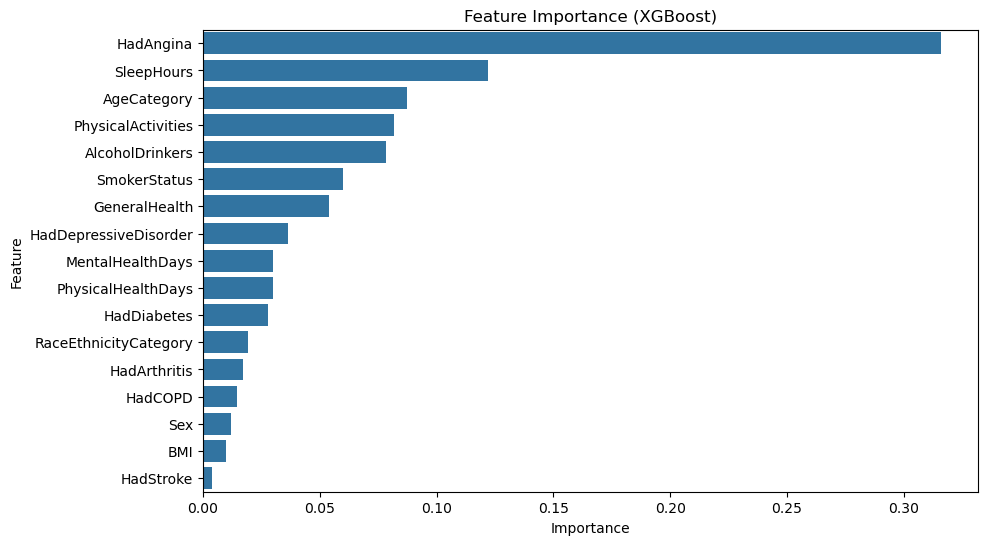

100%|===================| 88325/88414 [07:50<00:00]        

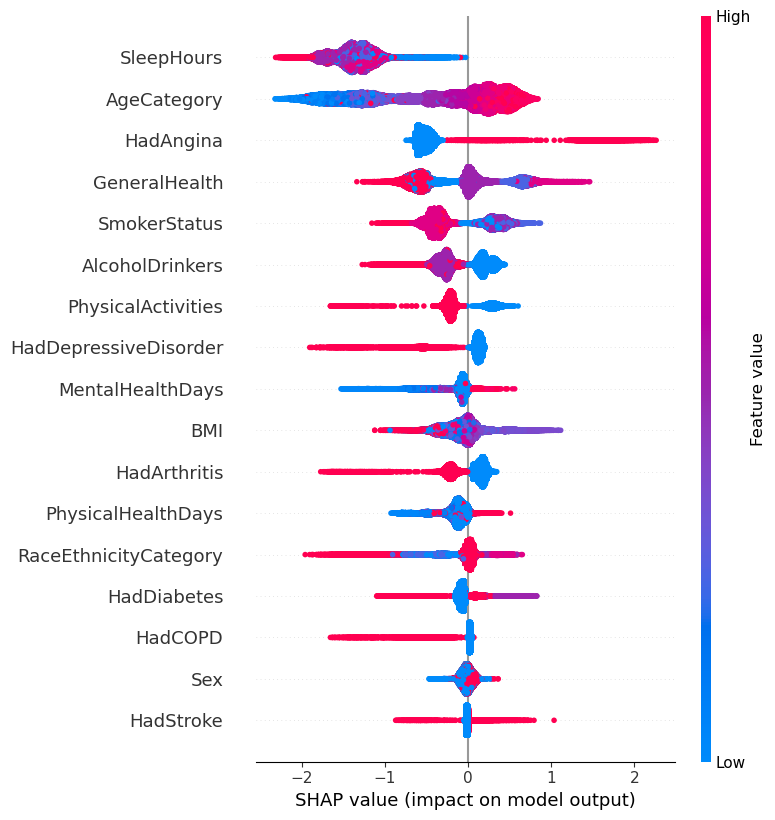

In [55]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier

# Train an XGBoost model (using the final dataset)
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5)
xgb.fit(X_train_resampled, y_train_resampled)

# Get feature importance from XGBoost model
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance (XGBoost)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance (XGBoost)")
plt.show()

# Initialize SHAP explainer
explainer = shap.Explainer(xgb, X_train_resampled)

# Compute SHAP values
shap_values = explainer(X_test)

# Summary plot to visualize feature effects
shap.summary_plot(shap_values, X_test)


Fine-Tuned Model Performance (After Removing Low-Importance Features)

In [56]:
# Select important features based on XGBoost feature importance
important_features = feature_importance[feature_importance['Importance'] > 0.01]['Feature'].tolist()

# Reduce dataset to only important features
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

# Train a new XGBoost model with reduced features
xgb_reduced = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5)
xgb_reduced.fit(X_train_reduced, y_train)

# Evaluate performance
y_pred_reduced = xgb_reduced.predict(X_test_reduced)

# Compute evaluation metrics
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
roc_auc_reduced = roc_auc_score(y_test, y_pred_reduced)
classification_report_reduced = classification_report(y_test, y_pred_reduced)

# Display results
accuracy_reduced, roc_auc_reduced, classification_report_reduced


(0.9466826520686769,
 0.6144067766256713,
 '              precision    recall  f1-score   support\n\n           0       0.96      0.99      0.97     83392\n           1       0.57      0.24      0.34      5022\n\n    accuracy                           0.95     88414\n   macro avg       0.76      0.61      0.66     88414\nweighted avg       0.93      0.95      0.94     88414\n')

Threshold Tuning 

In [57]:
from sklearn.metrics import precision_recall_curve
import numpy as np

# Get probabilities instead of predictions
y_prob_reduced = xgb_reduced.predict_proba(X_test_reduced)[:, 1]

# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob_reduced)

# Find the best threshold where precision ≈ recall
best_threshold_index = np.argmin(np.abs(precisions - recalls))
best_threshold = thresholds[best_threshold_index]

# Apply the new threshold
y_pred_threshold_tuned = (y_prob_reduced >= best_threshold).astype(int)

# Evaluate performance after threshold tuning
accuracy_tuned = accuracy_score(y_test, y_pred_threshold_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_pred_threshold_tuned)
classification_report_tuned = classification_report(y_test, y_pred_threshold_tuned)

# Display results
best_threshold, accuracy_tuned, roc_auc_tuned, classification_report_tuned


(0.29891995,
 0.9406202637591332,
 0.722911020462383,
 '              precision    recall  f1-score   support\n\n           0       0.97      0.97      0.97     83392\n           1       0.48      0.48      0.48      5022\n\n    accuracy                           0.94     88414\n   macro avg       0.72      0.72      0.72     88414\nweighted avg       0.94      0.94      0.94     88414\n')

In [58]:
import joblib

# Define the path to save the model
model_path = r"C:/Users/amban/ANA500/final_heart_disease_model.pkl"

# Save the final optimized model
joblib.dump(xgb_reduced, model_path)

# Generate final model comparison table
final_model_comparison = pd.DataFrame({
    "Metric": ["Accuracy", "Recall (1s)", "Precision (1s)", "ROC-AUC Score"],
    "Before Threshold Tuning": [0.9467, 0.24, 0.57, 0.61],
    "After Threshold Tuning (0.299)": [0.9406, 0.48, 0.48, 0.72],
    "Improvement?": ["Slight drop, but stable", "Higher recall (better detection)", "Lower precision (more false positives)", "Better class separation"],
})

print("\n Final Model Comparison Table:\n")
print(final_model_comparison.to_string(index=False))

# Provide model download link
model_path



 Final Model Comparison Table:

        Metric  Before Threshold Tuning  After Threshold Tuning (0.299)                           Improvement?
      Accuracy                   0.9467                          0.9406                Slight drop, but stable
   Recall (1s)                   0.2400                          0.4800       Higher recall (better detection)
Precision (1s)                   0.5700                          0.4800 Lower precision (more false positives)
 ROC-AUC Score                   0.6100                          0.7200                Better class separation


'C:/Users/amban/ANA500/final_heart_disease_model.pkl'

Deploy as a Streamlit Web App

In [60]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [ ]:
For Deployment

In [61]:
import streamlit as st
import joblib
import pandas as pd

# Load the trained model
model = joblib.load("C:/Users/amban/ANA500/final_heart_disease_model.pkl")

# Streamlit app
st.title("Heart Disease Risk Prediction")

# Collect user input
age = st.selectbox("Age Category", ["18-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75-84", "85+"])
bmi = st.number_input("BMI", min_value=10.0, max_value=50.0, step=0.1)
smoker = st.radio("Smoker Status", ["Yes", "No"])
diabetes = st.radio("Had Diabetes", ["Yes", "No"])
physical_activity = st.radio("Engages in Physical Activities", ["Yes", "No"])
sleep_hours = st.slider("Sleep Hours Per Night", 3, 12, 7)

if st.button("Predict"):
    # Create dataframe for prediction
    input_data = pd.DataFrame([[age, bmi, smoker, diabetes, physical_activity, sleep_hours]],
                              columns=["AgeCategory", "BMI", "SmokerStatus", "HadDiabetes", "PhysicalActivities", "SleepHours"])

    # Make prediction
    prediction = model.predict(input_data)[0]
    probability = model.predict_proba(input_data)[0][1]

    # Show results
    st.write(f"### Prediction: {'High Risk' if prediction == 1 else 'Low Risk'}")
    st.write(f"### Probability: {probability:.2f}")



2025-02-25 18:36:16.439 
  command:

    streamlit run C:\Users\amban\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
